# Spotify Exploratory Data Analysis

<img 
     src='https://images.unsplash.com/photo-1511379938547-c1f69419868d?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80' 
     style='border-radius: 5px; box-shadow: 0px 12px 17px -10px rgba(0,0,0,0.85);' 
 />

## Objectives of the EDA

- [x] Find top 5 most popular artists
- [x] Find top 5 loudest tracks
- [x] Artists with the most danceability songs
- [x] Top 10 instrumentalness tracks
- [x] Multiple feature plots for: 
    1. acousticness
    2. danceability
    3. duration_ms
    4. energy
    5. instrumentalness
    6. key
    7. liveness
    8. loudness
    9. mode
    10. speechiness
    11. tempo
    12. time_singnature
    13. valence
    14. target
    15. song_title

## Additional tasks
- [x] Find top 10 energetic tracks
- [x] Most common durations
- [x] Most popular artist
- [x] Top 10 tracks with the most valence

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set default seaborn style
sns.set_style('darkgrid')

## Import data

In [3]:
df = pd.read_csv('./data/data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
artists_df = pd.read_csv('./data/artists_data.csv')

## Clean the data

In [4]:
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [6]:
df.shape

(2017, 16)

In [7]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [8]:
len(df.columns)

16

## Analysis

In [9]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


### Find top 5 most popular artists

In [10]:
top_five_artists = df.groupby('artist').count().sort_values('song_title', ascending=False)['song_title'][:5]
top_five_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

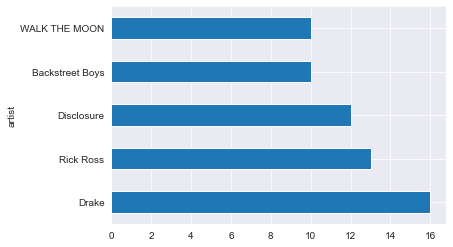

In [11]:
top_five_artists.plot.barh()
plt.show()

### Find top 5 loudest tracks

In [12]:
top_five_loudest_tracks = df[['loudness', 'song_title']].sort_values('loudness', ascending=True)[:5]
top_five_loudest_tracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


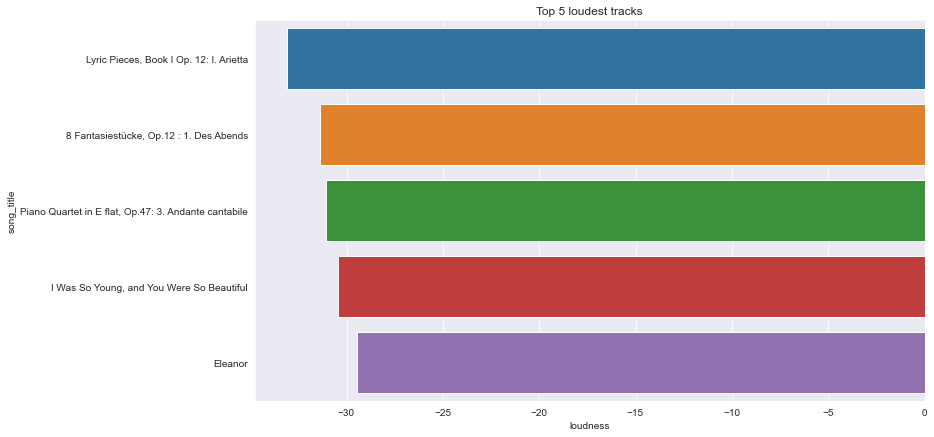

In [13]:
plt.figure(figsize=(12, 7))
sns.barplot(x='loudness', y='song_title', data=top_five_loudest_tracks)
plt.title("Top 5 loudest tracks")
plt.show()

### Artists with the most danceability songs

In [14]:
most_danceability_songs = df[['artist', 'song_title', 'danceability']].sort_values(by='danceability', ascending=False)[:5]
most_danceability_songs

,artist,song_title,danceability
1433,Ben Remember,Flashwind - Radio Edit,0.984
1901,Justin Timberlake,SexyBack,0.967
604,Blaqstarr,Check Me Out Like,0.962
32,Young Thug,Best Friend,0.959
1957,Vanilla Ice,Ice Ice Baby,0.959


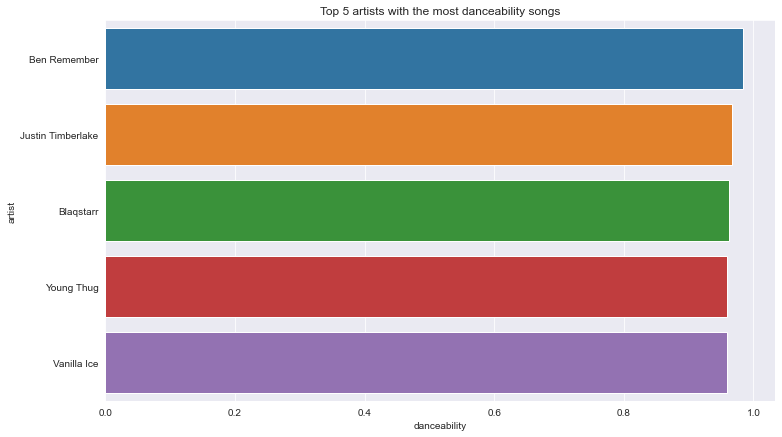

In [15]:
plt.figure(figsize=(12, 7))
sns.barplot(x='danceability', y='artist', data=most_danceability_songs)
plt.title('Top 5 artists with the most danceability songs')
plt.show()

### Top 10 instrumentalness tracks

In [16]:
top_ten_instrumentalness = df[['instrumentalness', 'song_title', 'artist']].sort_values(by='instrumentalness', ascending=False)[:10]
top_ten_instrumentalness

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


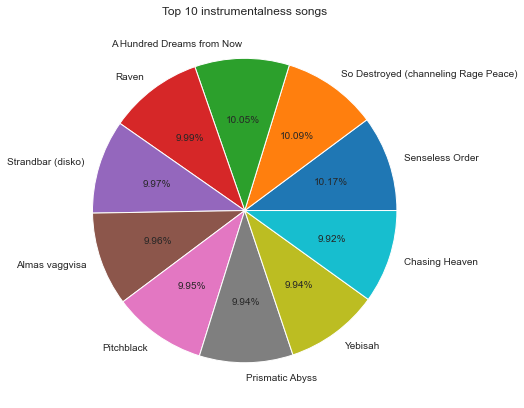

In [17]:
plt.figure(figsize=(12, 7))
plt.pie(
    x='instrumentalness', 
    data=top_ten_instrumentalness, 
    autopct='%1.2f%%', 
    labels=top_ten_instrumentalness['song_title']
)
plt.title('Top 10 instrumentalness songs')
plt.show()

### Multiple feature plots

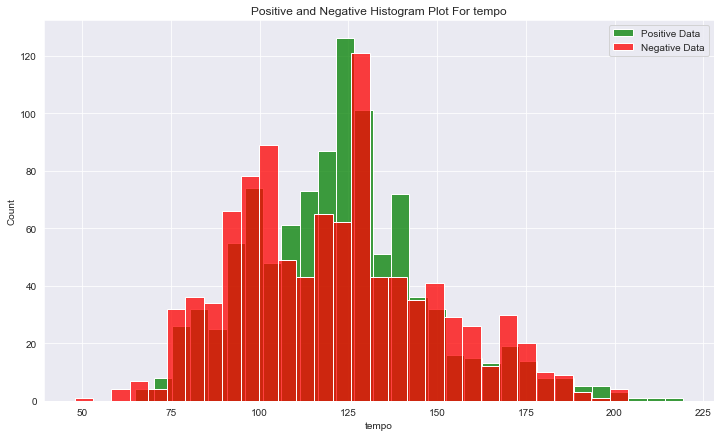

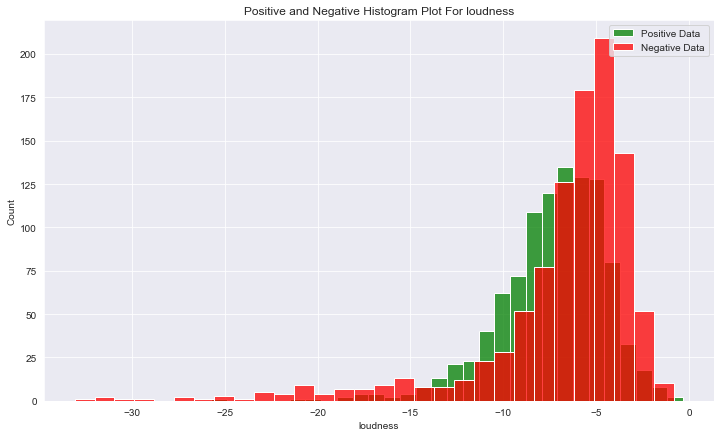

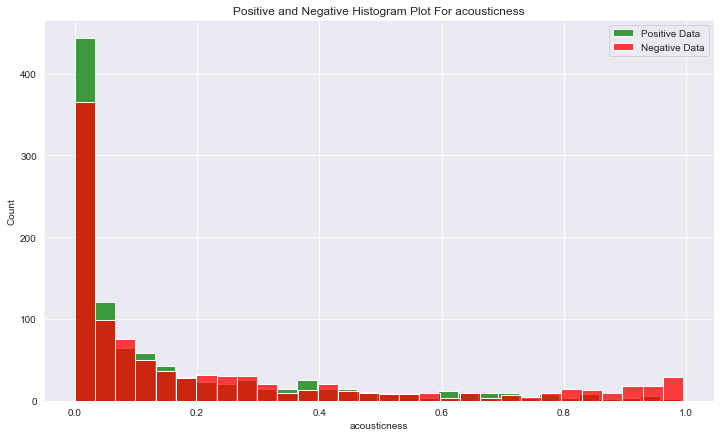

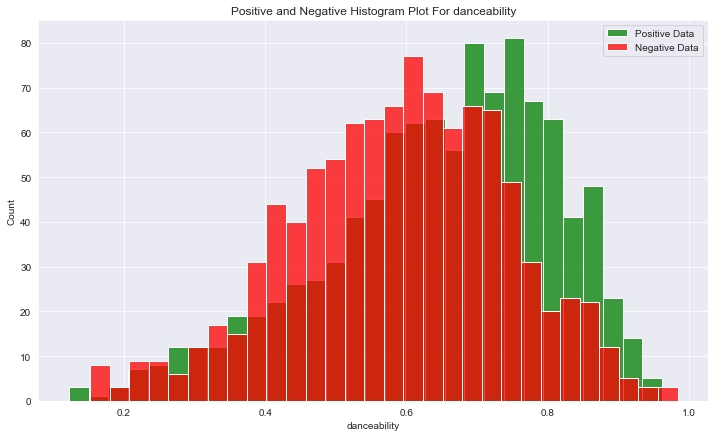

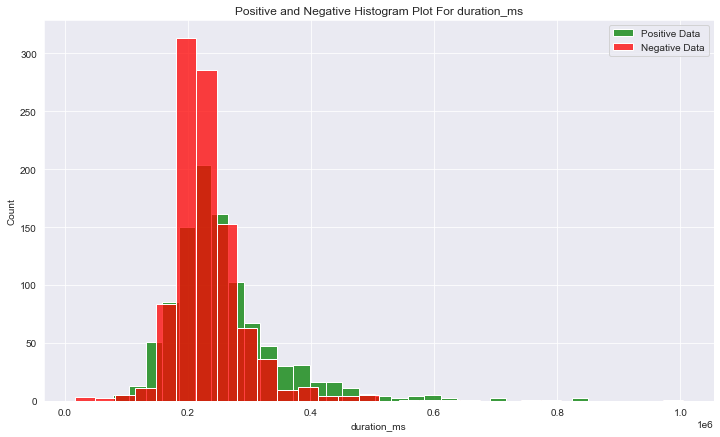

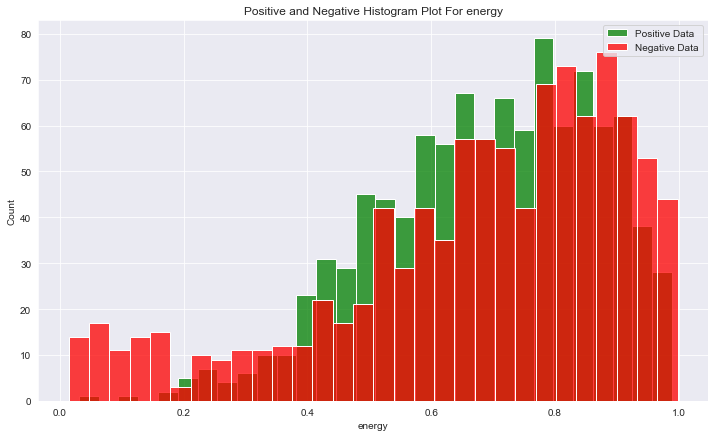

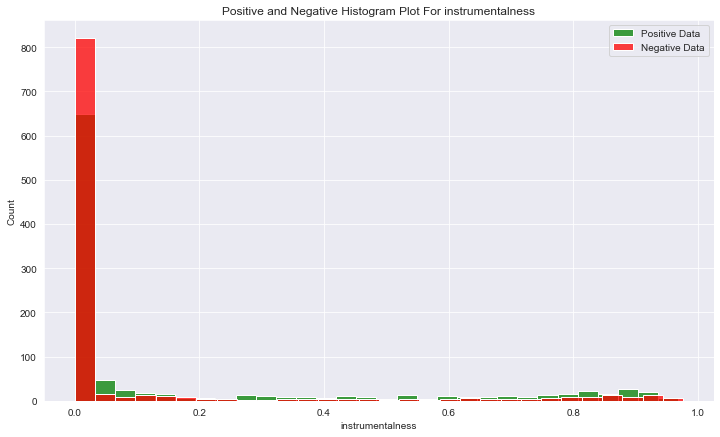

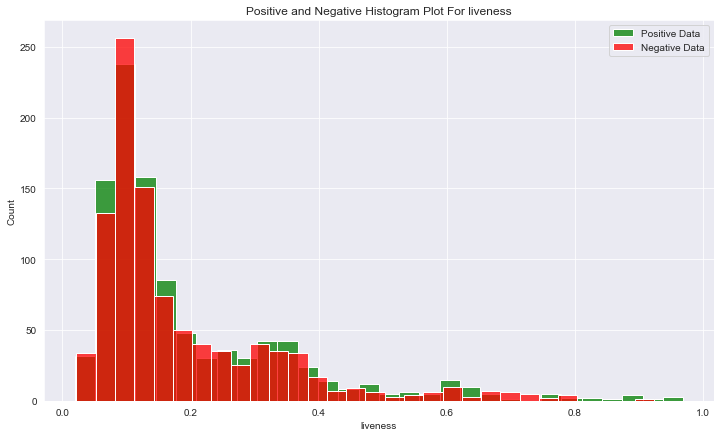

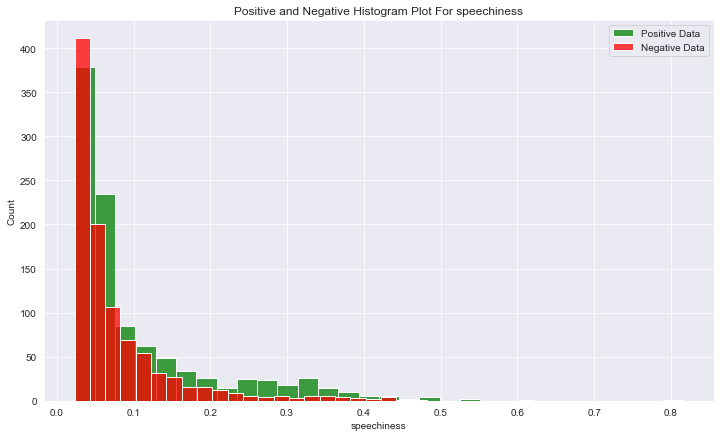

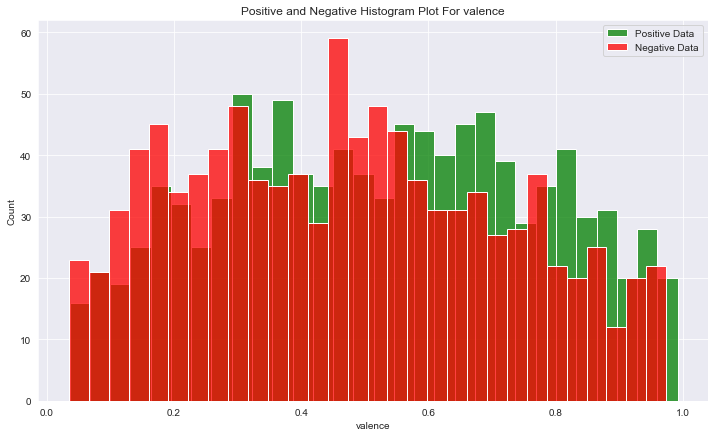

In [18]:
features = ['tempo', 'loudness', 'acousticness', 'danceability', 
            'duration_ms', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

for feature_col in features:
    pos_data = df[df['target'] == 1][feature_col]
    neg_data = df[df['target'] == 0][feature_col]
    
    plt.figure(figsize=(12, 7))
    
    sns.histplot(pos_data, bins=30, label='Positive Data', color='green')
    sns.histplot(neg_data, bins=30, label='Negative Data', color='red')
    
    plt.legend(loc='upper right')
    plt.title(f'Positive and Negative Histogram Plot For {feature_col}')
    
    plt.show()

### Find top 10 energetic tracks

In [19]:
top_ten_energetic_tracks = df[['energy', 'song_title', 'artist']].sort_values(by='energy', ascending=False)[:10]
top_ten_energetic_tracks

,energy,song_title,artist
1299,0.998,No Absolution,Thy Art Is Murder
1322,0.997,Pitchblack,Walking Dead On Broadway
1297,0.994,A Darkened Gospel,A Wake in Providence
1347,0.993,Unanswered,Suicide Silence
2015,0.992,First Contact,Twin Moons
1680,0.992,Paranoia,A Day To Remember
1332,0.992,Beautiful Agony,Within The Ruins
1328,0.991,Down into the Abyss,Conjonctive
1681,0.990,Hated,Beartooth
1296,0.990,Black Colors,Victim Of Deception


<AxesSubplot:xlabel='song_title', ylabel='energy'>

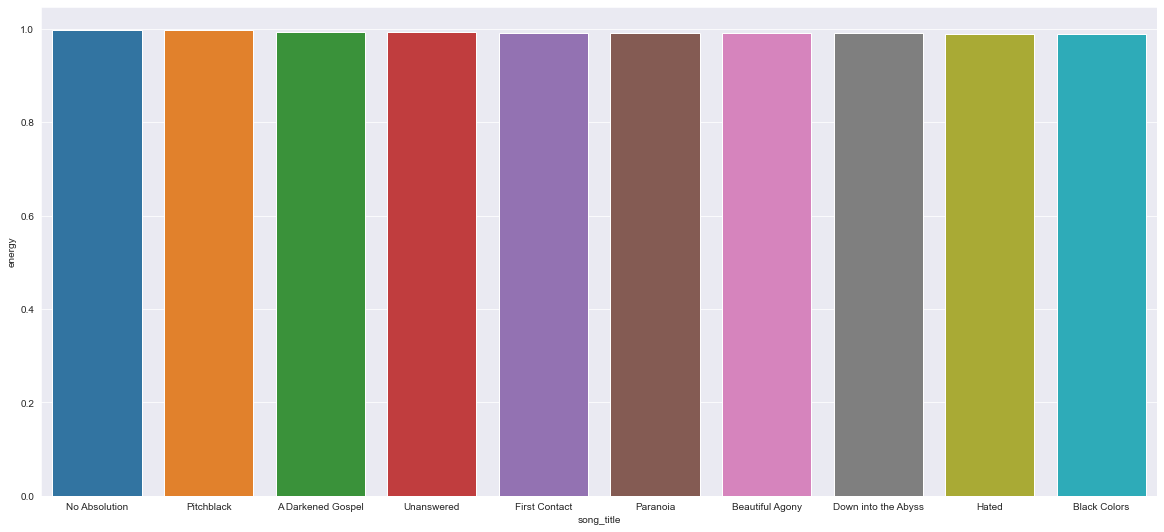

In [20]:
plt.figure(figsize=(20, 9))
sns.barplot( x='song_title', y='energy', data=top_ten_energetic_tracks )

### Most common durations

In [21]:
from datetime import datetime

most_common_durations = df[['duration_ms']].mode()
datetime.fromtimestamp(most_common_durations.iloc[0][0]/1000).strftime('The most common durations = %M:%S')

'The most common durations = 03:12'

### Most popular artist

In [25]:
most_popular_artist = artists_df[['name', 'popularity']].sort_values(by='popularity', ascending=False)
most_popular_artist

,name,popularity
0,Drake,95
4,Future,89
5,Travis Scott,88
8,Lil Peep,83
3,Avicii,81
6,Florida Georgia Line,76
1,deadmau5,68
2,Ratatat,68
7,Lil Pump,67


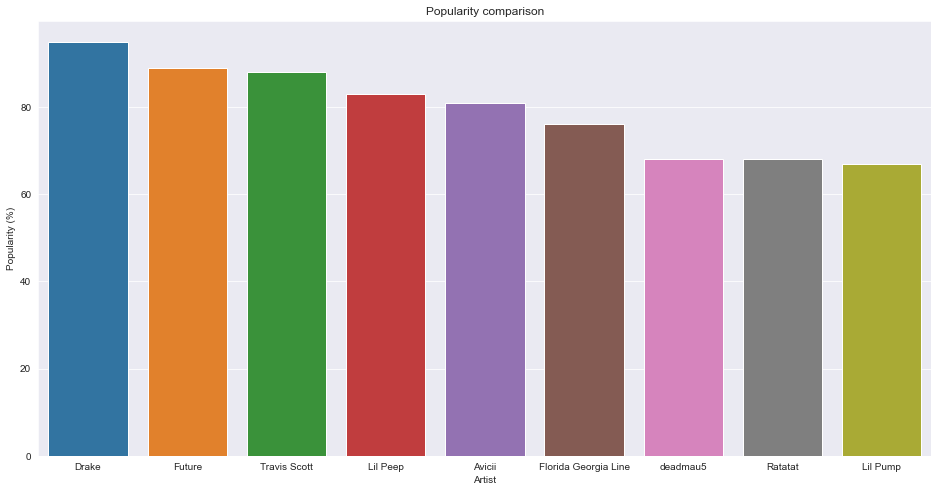

In [34]:
plt.figure(figsize=(16, 8))
sns.barplot(x='name', y='popularity', data=most_popular_artist)
plt.title('Popularity comparison')
plt.xlabel('Artist')
plt.ylabel('Popularity (%)')
plt.show()

### Top 10 most valence tracks

In [42]:
top_ten_most_valence_tracks = df[['song_title', 'valence', 'artist']].sort_values(by='valence', ascending=False)[:10]
top_ten_most_valence_tracks

,song_title,valence,artist
460,Abataka - Original Mix,0.992,Ida Engberg
912,I'm Walkin' - 2002 Digital Remaster,0.975,Fats Domino
1966,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)",0.974,Polina
207,Look at You,0.973,George McCrae
48,Azon de ma gnin kpevi,0.973,T. P. Orchestre Poly-Rythmo
337,Let's Lovedance Tonight - Danny Krivit Re-edit...,0.972,Gary's Gang
1590,Jelly On A Plate,0.972,The Kids Band
838,Let's Lovedance Tonight - Danny Krivit Re-edit...,0.971,Gary's Gang
497,Mi Swing es Tropical,0.968,Nickodemus
112,Please Mr. Postman,0.967,The Marvelettes


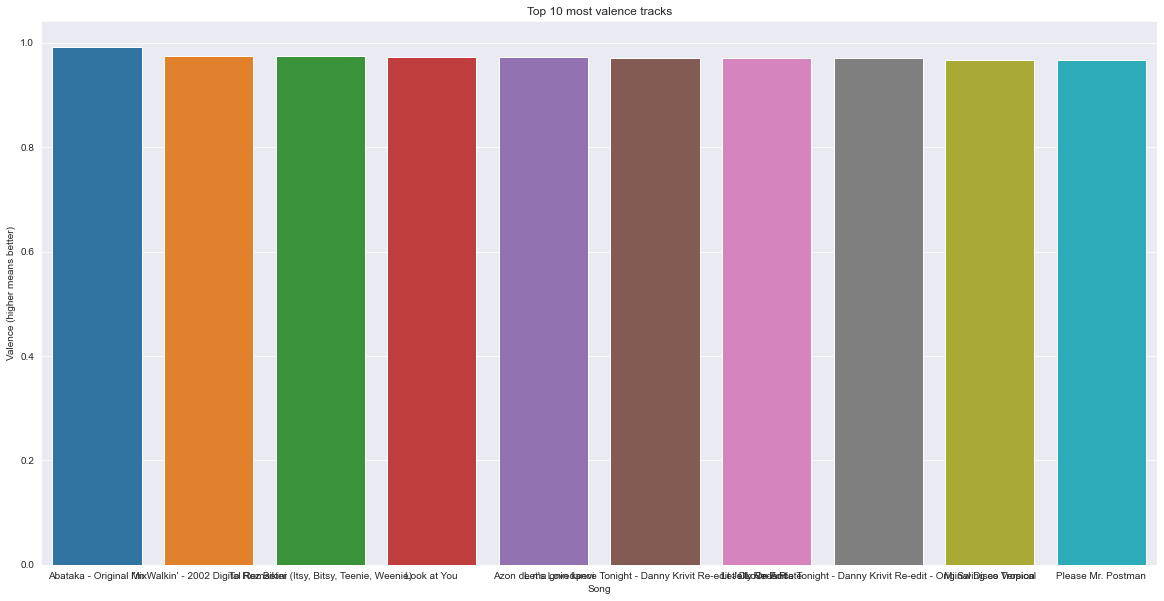

In [46]:
plt.figure(figsize=(20, 10))
sns.barplot(x='song_title', y='valence', data=top_ten_most_valence_tracks)
plt.title('Top 10 most valence tracks')
plt.xlabel('Song')
plt.ylabel('Valence (higher means better)')
plt.show()